<a href="https://colab.research.google.com/github/prabh505/Black_friday_sale_EDA/blob/main/Black_friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ---------------------------------------------
# 📦 Step 1: Import Libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')


In [3]:
# ---------------------------------------------
# 📂 Step 2: Load Dataset
# ---------------------------------------------
df = pd.read_csv('/content/BlackFriday.csv')  # Update path if needed
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# ---------------------------------------------
# 📊 Step 3: Basic Info
# ---------------------------------------------
print("Shape of dataset:", df.shape)
print("\nData types and non-null values:\n")
df.info()

print("\nSummary statistics:\n")
df.describe(include='all').T


Shape of dataset: (537577, 12)

Data types and non-null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: floa

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,537577.0,NaN,NaN,NaN,1002991.847028,1714.392695,1000001.0,1001495.0,1003031.0,1004417.0,1006040.0
Product_ID,537577,3623,P00265242,1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,537577,2,M,405380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,537577,7,26-35,214690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,537577.0,NaN,NaN,NaN,8.08271,6.52412,0.0,2.0,7.0,14.0,20.0
City_Category,537577,3,B,226493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,537577,5,1,189192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,537577.0,NaN,NaN,NaN,0.408797,0.491612,0.0,0.0,0.0,1.0,1.0
Product_Category_1,537577.0,NaN,NaN,NaN,5.295546,3.750701,1.0,1.0,5.0,8.0,18.0
Product_Category_2,370591.0,NaN,NaN,NaN,9.842144,5.087259,2.0,5.0,9.0,15.0,18.0


In [5]:
# ---------------------------------------------
# ❓ Step 4: Missing Value Analysis
# ---------------------------------------------
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
Product_Category_3,373299
Product_Category_2,166986


In [6]:
# ---------------------------------------------
# 🧹 Step 5: Handling Missing Values
# ---------------------------------------------
# Fill with mode (most frequent value) or -1 if unsure
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)

print("Missing values after filling:", df.isnull().sum().sum())


Missing values after filling: 0


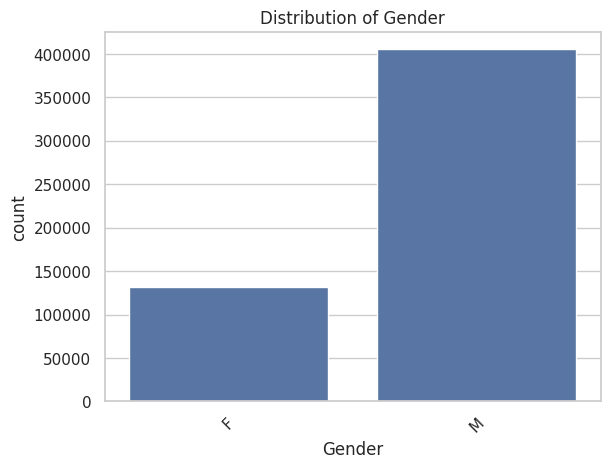

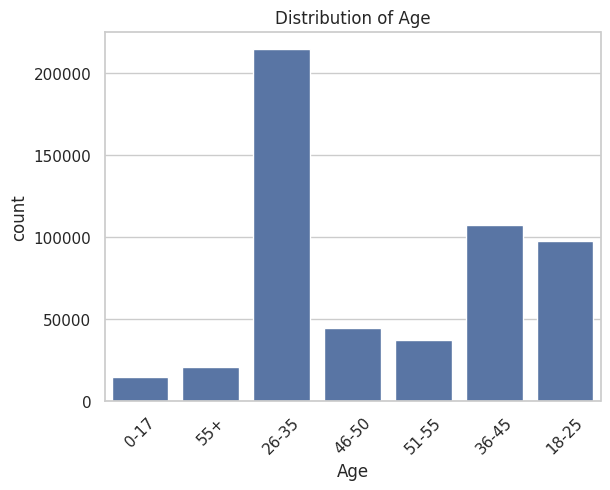

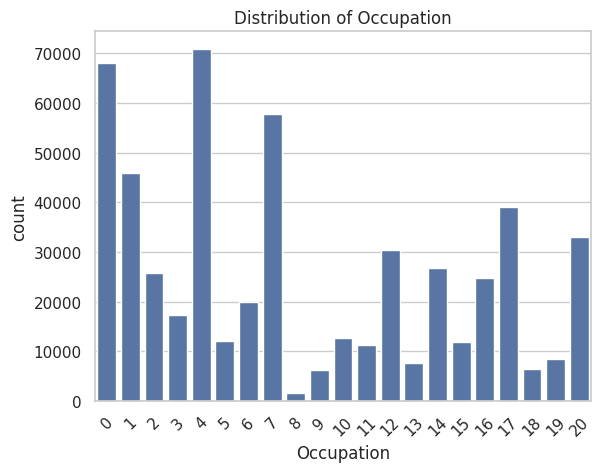

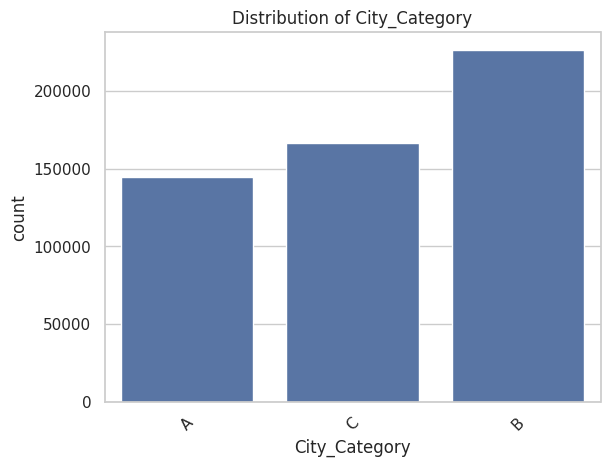

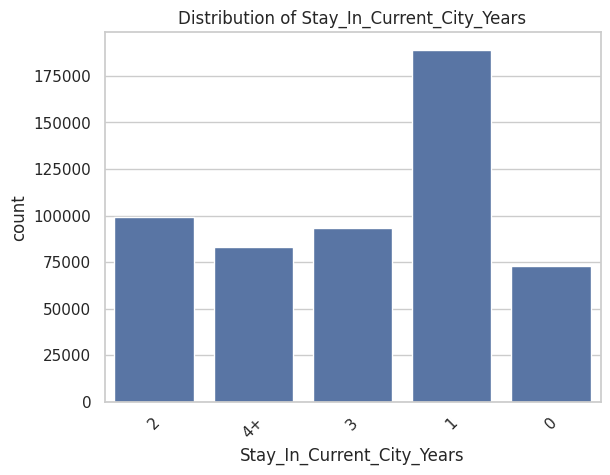

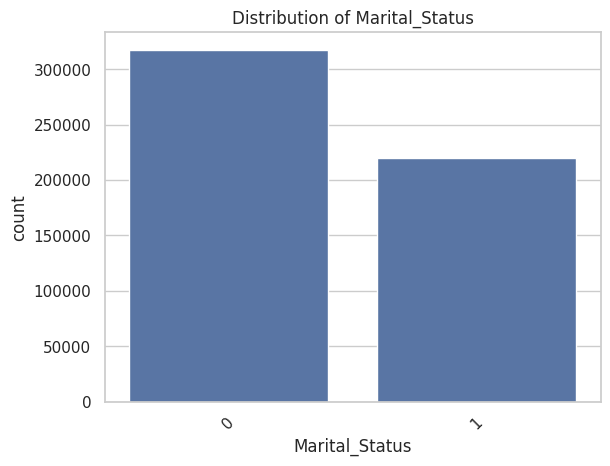

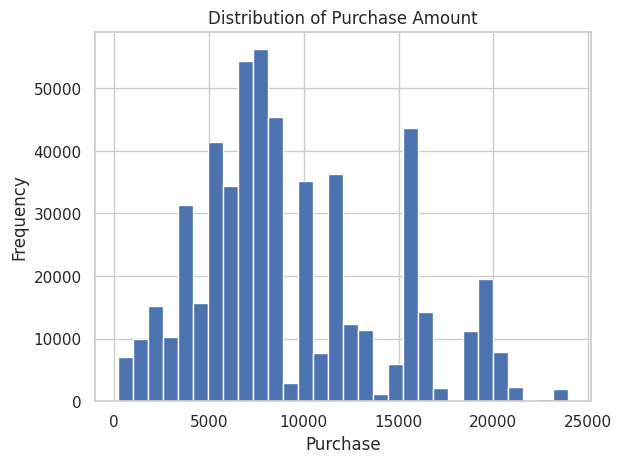

In [7]:
# ---------------------------------------------
# 🔍 Step 6: Univariate Analysis
# ---------------------------------------------
# Categorical features
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Numerical features
df['Purchase'].hist(bins=30)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase")
plt.ylabel("Frequency")
plt.show()


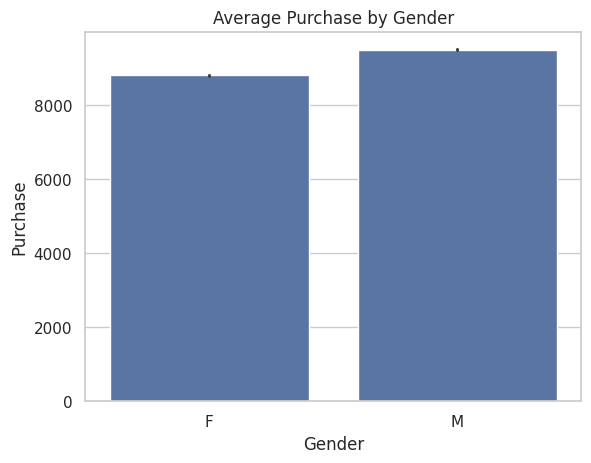

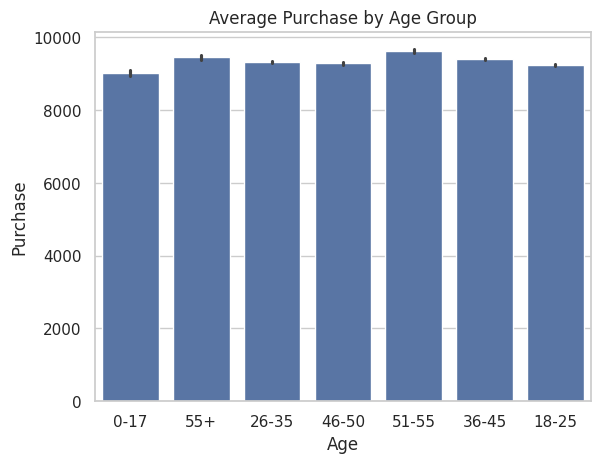

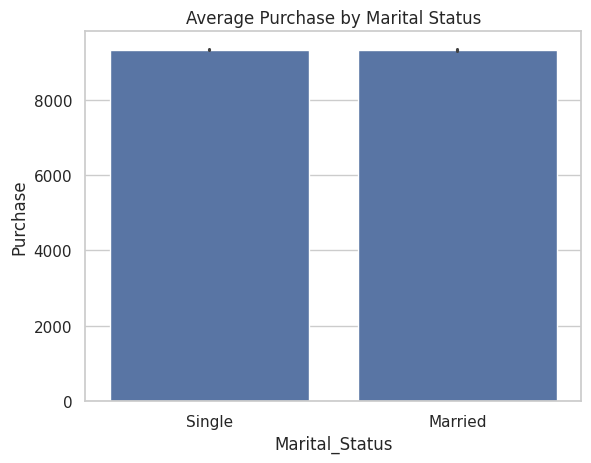

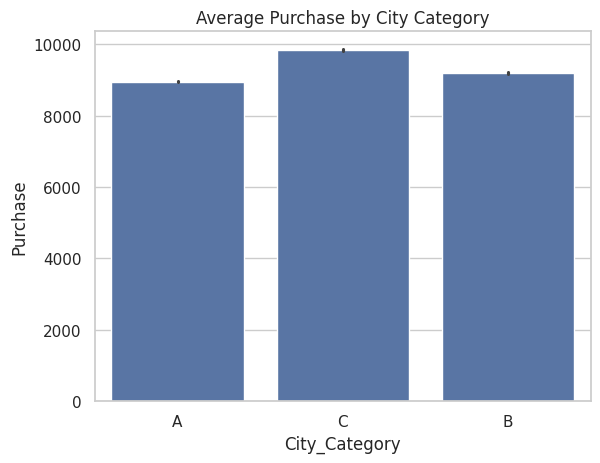

In [8]:
# ---------------------------------------------
# 🤝 Step 7: Bivariate Analysis
# ---------------------------------------------
# Gender vs Purchase
sns.barplot(data=df, x='Gender', y='Purchase')
plt.title('Average Purchase by Gender')
plt.show()

# Age vs Purchase
sns.barplot(data=df, x='Age', y='Purchase', estimator=np.mean)
plt.title('Average Purchase by Age Group')
plt.show()

# Marital Status vs Purchase
sns.barplot(data=df, x='Marital_Status', y='Purchase')
plt.title('Average Purchase by Marital Status')
plt.xticks([0, 1], ['Single', 'Married'])
plt.show()

# City Category
sns.barplot(data=df, x='City_Category', y='Purchase')
plt.title('Average Purchase by City Category')
plt.show()


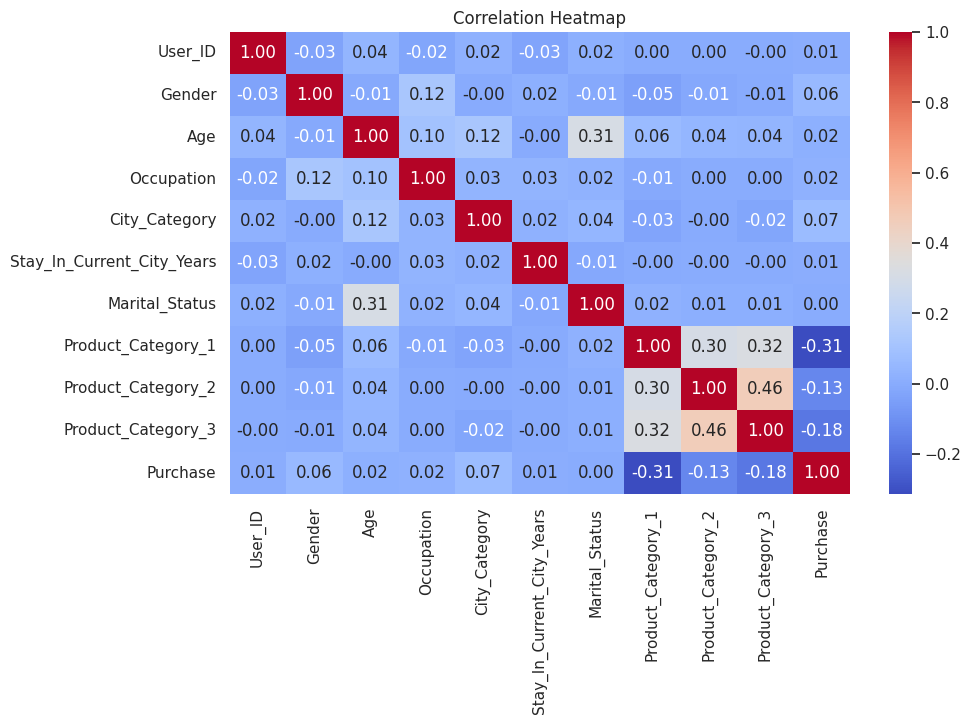

In [10]:
# ---------------------------------------------
# 🧠 Step 8: Correlation Analysis
# ---------------------------------------------
# Encode Gender and City for correlation
df_corr = df.copy()
df_corr['Gender'] = df_corr['Gender'].map({'F': 0, 'M': 1})
df_corr['City_Category'] = df_corr['City_Category'].map({'A': 0, 'B': 1, 'C': 2})
df_corr['Age'] = df_corr['Age'].map({
    '0-17': 15, '18-25': 21, '26-35': 30, '36-45': 40,
    '46-50': 48, '51-55': 53, '55+': 60
})
df_corr['Stay_In_Current_City_Years'] = df_corr['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

# Correlation heatmap - exclude Product_ID column
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.drop('Product_ID', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

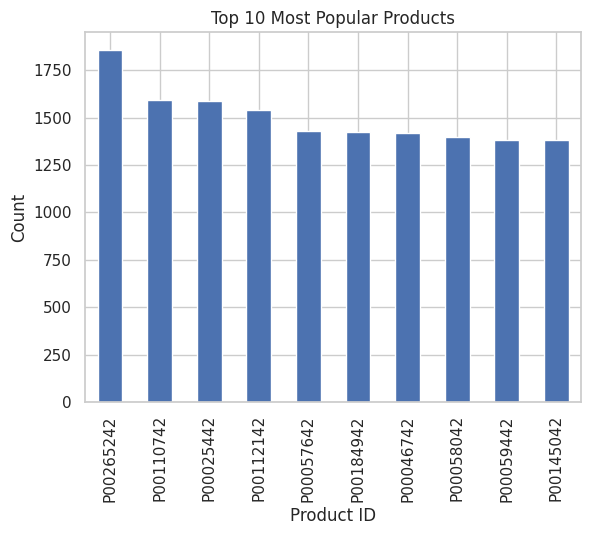

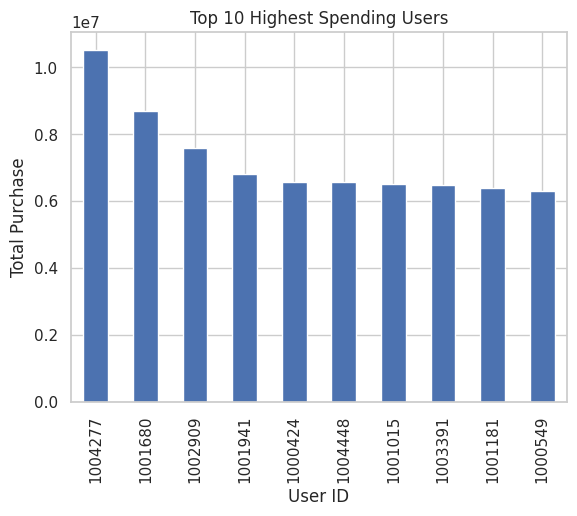

In [11]:
# ---------------------------------------------
# 🏆 Step 9: Top Products and Users
# ---------------------------------------------
# Top 10 most sold products
top_products = df['Product_ID'].value_counts().head(10)
top_products.plot(kind='bar', title='Top 10 Most Popular Products')
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.show()

# Top 10 highest spenders
top_spenders = df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False).head(10)
top_spenders.plot(kind='bar', title='Top 10 Highest Spending Users')
plt.xlabel("User ID")
plt.ylabel("Total Purchase")
plt.show()
